# Table of Contents
1. [Introduction](#introduction)
    1. [Sample Code Cells](#sample_code_cells)
    2. [Documentation](#documentation)
2. [Magics](#magics)
    1. [Magics Introduction](#magics)
    2. [Profiling](#profiling)
    3. [Combining Different Languages](#combining_languages)
3. [Widgets](#paragraph2)
4. [Additional Resources](#additional_resources)

# Introduction <a name="introduction"></a>

Jupyter notebooks were born from the IPython project. The name "Jupyter" comes from combining three languages: Julia, Python, and R, but Jupyter notebooks support a variety of different programming languages. [How do notebooks work?](https://jupyter.readthedocs.io/en/latest/architecture/how_jupyter_ipython_work.html)

> ### [Beyond Interactive: Notebook Innovation at Netflix](https://medium.com/netflix-techblog/notebook-innovation-591ee3221233)
> "Notebooks have rapidly grown in popularity among data scientists to become the de facto standard for quick prototyping and exploratory analysis. At Netflix, we’re pushing the boundaries even further, reimagining what a notebook can be, who can use it, and what they can do with it. And we’re making big investments to help make this vision a reality."

## Sample Code Cells <a name="sample_code_cells"></a>

In [1]:
# A sample function
def say_hello(name):
    return('Hello '+ name)

In [2]:
print(say_hello('World'))

Hello World


In [3]:
say_hello('World')
say_hello('SOA')

'Hello SOA'

In [4]:
say_hello('SOA');

## Documentation <a name="documentation"></a>
Jupyter notebooks are an easy and effective method of documenting your process and findings. The language used for documentation within Jupyter notebooks is called **Markdown**. Reference: [Markdown Basics](https://markdown-guide.readthedocs.io/en/latest/basics.html) 

Within Markdown you can include mathematical expressions within your code using the following syntax: `$$ <mathematical expression> $$`

$$ a^2 + b^2 = c^2 $$
$$ \sum_{i=1}^n (1+r)^{-i} $$
$$ \int_0^\infty \mathrm{e}^{-x}\,\mathrm{d}x $$

Embedding HTML, images, or videos is also easy.

In [5]:
from IPython.display import display, YouTubeVideo, HTML, Image

In [6]:
Image(url='http://affirmagency.com/assets/data-quote.png')

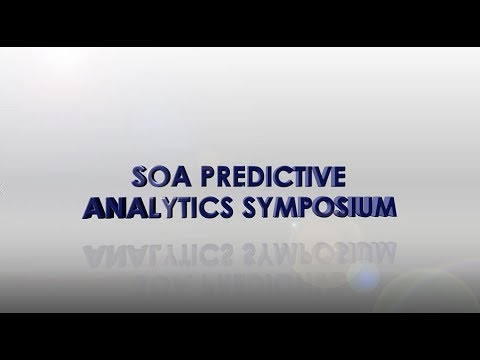

In [7]:
YouTubeVideo('8oisAcVTZfQ')

In [8]:
display(HTML('<h2>This is a header!</h2>'))

# Magic Functions <a name="magics"></a>
### One of the highlights of jupyter notebooks are magic functions. You can view all magic functions and helpful documentation with 
```python
%magic
```

In [9]:
%magic

You can run shell commands and capture the output using `!`

In [10]:
!ls

data	for_labs_demo.ipynb		 requirements.txt
dt.dot	jupyter_notebook_tutorial.ipynb  utils
dt.png	__pycache__			 utils.py


In [11]:
!conda info --envs 

# conda environments:
#
myenv                    /home/dsuser/.conda/envs/myenv
py35                     /anaconda/envs/py35
root                  *  /anaconda



In [12]:
x = 10

In [13]:
%who_ls

['HTML', 'Image', 'YouTubeVideo', 'display', 'say_hello', 'x']

You can use `?` for help on any function, for information on any variable, and help on any magic function. Use ?? for more concise documentation.

In [14]:
? x

In [15]:
?Image

Alternatively, use Shift + Tab immediately after typing an object name

In [16]:
Image

IPython.core.display.Image

# Profiling <a name="profiling"></a>
Profiling is a easy and effective way to identify bottlenecks in your code.

In [17]:
%load_ext line_profiler

In [18]:
def profile_slow(n):
    total = 0
    for i in range(n):
        total += slow_func(i)
    return total
        
def profile_fast(n):
    total = 0
    for i in range(n):
        total += fast_func(i)
    return total
    
def slow_func(x):
    number_list = range(x)
    total = sum(number_list)
    return total
    
def fast_func(x):
    return ((x+1)*x)/2

In [19]:
%time profile_slow(1000)

CPU times: user 8.02 ms, sys: 0 ns, total: 8.02 ms
Wall time: 7.98 ms


166167000

In [20]:
%timeit profile_slow(1000)

8.64 ms ± 421 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%lprun -f profile_slow profile_slow(1000)

In [22]:
%timeit profile_fast(1000)

232 µs ± 17.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
%lprun -f profile_fast profile_fast(1000)

# Combining different languages <a name="combining_languages"></a>

Let's try working through a simple example using a jupyter notebook.

You acquire a small life insurance company. Unfortunately, the underwriting manual they were using to accept cases was tragically lost in the acquisition. You are tasked with recreating their underwriting manual as closely as possible. The carrier only had one class, so underwriting outcomes are either **Standard** or **Decline**.

Fortunately, the company had a dataset of the last 10000 applications which were received over the past year and include information such as:
* Underwriting class
* Issue age
* Face Amount
* BMI
* Does the person have diabetes?
* Does the person have high blood pressure?

In [24]:
%matplotlib inline
import pandas as pd

In [25]:
import seaborn as sns

/home/dsuser/.conda/envs/myenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dsuser/.conda/envs/myenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [26]:
df = pd.read_csv("data/underwriting_data.csv")
df.set_index("Person ID", inplace=True)
df.head()

,Underwriting Class,Face Amount,Issue Age,BMI,Diabetes,High Blood Pressure
Person ID,,,,,,
1,Standard,495000.0,49.0,28.967711,False,False
2,Standard,375000.0,55.0,26.110713,False,False
3,Standard,234000.0,38.0,24.237394,False,False
4,Standard,477000.0,42.0,20.039574,False,False
5,Standard,776000.0,58.0,24.926617,False,False


In [27]:
df.describe()

,Face Amount,Issue Age,BMI
count,10000.000000,10000.000000,10000.000000
mean,511974.700000,39.789500,25.641679
std,192065.736623,9.923026,3.253010
min,103000.000000,18.000000,20.039574
25%,361000.000000,32.000000,23.673372
50%,502000.000000,39.000000,25.158604
75%,651000.000000,47.000000,26.901814
max,998000.000000,67.000000,44.773736


In [28]:
df['Underwriting Class'].value_counts(normalize=True)

Standard    0.9
Decline     0.1
Name: Underwriting Class, dtype: float64

In [29]:
df.pivot_table(index="Underwriting Class", values=["Diabetes", "High Blood Pressure"])

,Diabetes,High Blood Pressure
Underwriting Class,,
Decline,0.149000,0.190000
Standard,0.045556,0.030444


/home/dsuser/.conda/envs/myenv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


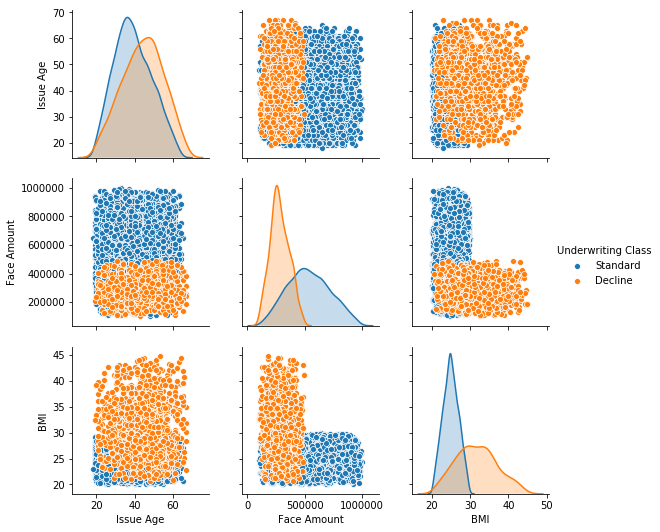

In [30]:
sns.pairplot(df[["Underwriting Class", "Issue Age", "Face Amount", "BMI"]], 
             hue="Underwriting Class", 
             diag_kind="kde")

While matplotlib has impressive plotting capabilities, some things might be more familiar to do within ggplot.

In [31]:
%load_ext rpy2.ipython

In [32]:
# We need ggplot2
%R require(ggplot2)

/home/dsuser/.conda/envs/myenv/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

/home/dsuser/.conda/envs/myenv/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


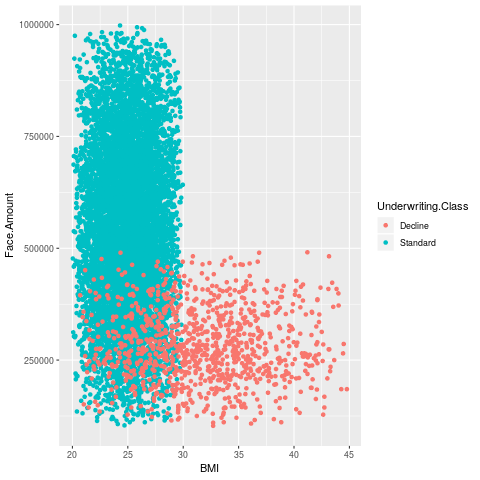

In [33]:
%%R -i df
ggplot(df, aes(BMI, Face.Amount, color=Underwriting.Class)) + geom_point()

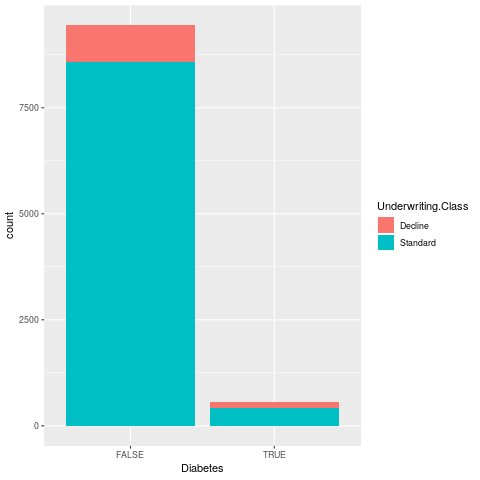

In [34]:
%%R
ggplot(df, aes(Diabetes, ..count..)) + geom_bar(aes(fill=Underwriting.Class))

#### Begin simple model

In [35]:
features = ["Issue Age", "Face Amount", "BMI", "Diabetes", "High Blood Pressure"]
X = df[features]
y = df["Underwriting Class"]

In [36]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

/home/dsuser/.conda/envs/myenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dsuser/.conda/envs/myenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [37]:
clf = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=.001, random_state=0)

In [38]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [39]:
from PIL import Image

def visualize_tree(clf, features):
    with open("dt.dot", 'w') as f:
        export_graphviz(clf, out_file=f,
                        feature_names=features)
    !dot -Tpng dt.dot -o dt.png
    im = Image.open("dt.png")
    return im

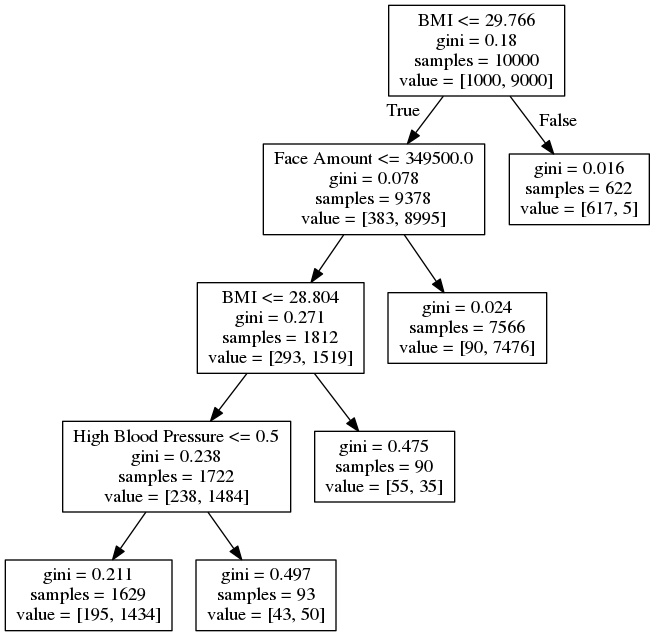

In [40]:
visualize_tree(clf, features)

How well did we do?

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve, auc

In [42]:
predictions = clf.predict(X)

In [43]:
print("Accuracy of decision tree: {0:.1f}%".format(100*accuracy_score(y, predictions)))

Accuracy of decision tree: 96.3%


The columns represent the model prediction and the rows represent the actual underwriting outcome.

In [44]:
print("Confusion Matrix: ")
pd.DataFrame(confusion_matrix(y, predictions), columns=["Decline", "Standard"], index=["Decline", "Standard"])

Confusion Matrix: 


,Decline,Standard
Decline,672,328
Standard,40,8960


In [45]:
print("Precision of decision tree: {0:.1f}%".format(100*precision_score(y, predictions, pos_label='Standard')))
print("Recall of decision tree: {0:.1f}%".format(100*recall_score(y, predictions, pos_label='Standard')))

Precision of decision tree: 96.5%
Recall of decision tree: 99.6%


In [46]:
import matplotlib.pyplot as plt

AUC-PR: 0.991271


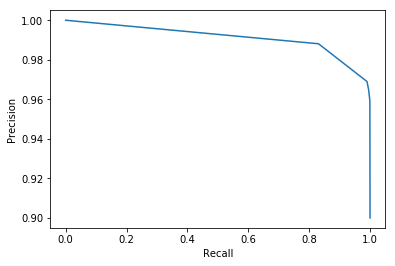

In [47]:
probabilities = clf.predict_proba(X)
precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y, probabilities[:,1], pos_label='Standard')
plt.plot(recall_curve, precision_curve)
plt.xlabel('Recall')
plt.ylabel('Precision'),
auc_val = auc(recall_curve,precision_curve)
print('AUC-PR: {0:1f}'.format(auc_val))

All my metrics (accuracy, precision, recall, AUC) look very good.  
In the real world: have I overfit to the data?

We can also quickly build a GLM in R and extract predictions.

In [48]:
%%R -o glm_predictions
df$Underwriting.Class = as.factor(df$Underwriting.Class)
glmfit <- glm(Underwriting.Class ~ ., family=binomial, data=df)
r_summary <- capture.output(summary(glmfit))
glm_predictions <- predict(glmfit, df, type="response")

In [49]:
r_summary = %R r_summary
for line in r_summary[2:-1]:
    print(line)

glm(formula = Underwriting.Class ~ ., family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9346   0.0239   0.0717   0.1826   2.3201  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              1.747e+01  7.194e-01  24.276  < 2e-16 ***
Face.Amount              1.136e-05  5.131e-07  22.136  < 2e-16 ***
Issue.Age               -5.660e-02  5.658e-03 -10.004  < 2e-16 ***
BMI                     -6.245e-01  2.394e-02 -26.085  < 2e-16 ***
DiabetesTRUE            -1.148e+00  1.946e-01  -5.897  3.7e-09 ***
High.Blood.PressureTRUE -2.224e+00  1.904e-01 -11.684  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6501.7  on 9999  degrees of freedom
Residual deviance: 2222.1  on 9994  degrees of freedom
AIC: 2234.1

Number of Fisher Scoring iterations: 8


In [50]:
type(glm_predictions)

rpy2.robjects.vectors.FloatVector

In [51]:
import numpy as np

In [52]:
np.asarray(glm_predictions)

array([0.90248766, 0.90942186, 0.94464412, ..., 0.54991705, 0.83170728,
       0.21185266])

# Widgets <a name="widgets"></a>
Widgets are a great way to add interactivity to your notebooks. [Installation Instructions & Documentation](https://ipywidgets.readthedocs.io/en/stable/)

In [53]:
from ipywidgets import widgets

In [54]:
text = widgets.Text()
display(text)

def handle_submit(sender):
    print(text.value)
    
text.on_submit(handle_submit);

Text(value='')

In [55]:
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")
    
button.on_click(on_button_clicked);

Button(description='Click Me!', style=ButtonStyle())

In [56]:
def f(x):
    print(x)
    
widgets.interact(f, x=100);

interactive(children=(IntSlider(value=100, description='x', max=300, min=-100), Output()), _dom_classes=('widg…

Let's combine our widget knowledge and create some kickout rules for the dataset above.

In [57]:
diabetes_button = widgets.Checkbox(value=False, description="Kick out Diabetes?")
hbp_button = widgets.Checkbox(value=False, description="Kick out High Blood Pressure?")
bmi_slider = widgets.FloatRangeSlider(value=[20, 45], min=10, max=50, step=.1, description="Acceptable BMI Range")
issue_age_slider = widgets.IntRangeSlider(value=[18, 75], min=0, max=120, step=1.0, 
                                            description="Acceptable Issue Age Range")
face_amount_slider = widgets.FloatSlider(value=1e6, min=0, max=1e6, step=10000, readout_format="$,.0f", 
                                         description="Face Amount Threshold")

display(diabetes_button)
display(hbp_button)
display(bmi_slider)
display(issue_age_slider)
display(face_amount_slider)

stp_text = widgets.Text(description="Straight Through Pass Rate")
decline_text = widgets.Text(description="Decline Percentage")

display(stp_text)
display(decline_text)

def calc_metrics(sender):
    ix = True
    if diabetes_button.value:
        ix &= ~df["Diabetes"]
    if hbp_button.value:
        ix &= ~df["High Blood Pressure"]
    ix &= df["BMI"] >= bmi_slider.value[0]
    ix &= df["BMI"] <= bmi_slider.value[1]
    
    ix &= df["Issue Age"] >= issue_age_slider.value[0]
    ix &= df["Issue Age"] <= issue_age_slider.value[1]
    
    ix &= df["Face Amount"] <= face_amount_slider.value
        
    tmp = df[ix]
    
    stp_text.value = "{0:.0f}%".format(100*tmp.shape[0] / df.shape[0])
    decline_text.value = "{0:.0f}%".format(100*(tmp["Underwriting Class"] == "Decline").sum() / tmp.shape[0])

    
diabetes_button.observe(calc_metrics)
hbp_button.observe(calc_metrics)
bmi_slider.observe(calc_metrics)
issue_age_slider.observe(calc_metrics)
face_amount_slider.observe(calc_metrics)
calc_metrics(None);

Checkbox(value=False, description='Kick out Diabetes?')

Checkbox(value=False, description='Kick out High Blood Pressure?')

FloatRangeSlider(value=(20.0, 45.0), description='Acceptable BMI Range', max=50.0, min=10.0)

IntRangeSlider(value=(18, 75), description='Acceptable Issue Age Range', max=120)

FloatSlider(value=1000000.0, description='Face Amount Threshold', max=1000000.0, readout_format='$,.0f', step=…

Text(value='', description='Straight Through Pass Rate')

Text(value='', description='Decline Percentage')

### Jupyter Labs: [Try it Out](https://jupyterlab.readthedocs.io/en/stable/index.html)

In [58]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from '/home/dsuser/soa_2018/utils.py'>

In [59]:
sample_value = 10e6

In [60]:
formatted_sample = utils.format_amt(sample_value)

In [61]:
formatted_sample

'10,000k'

## Criticisms
1. State is hidden (can run cells out of order)
2. Version control difficulties
    1. Work arounds [here](http://timstaley.co.uk/posts/making-git-and-jupyter-notebooks-play-nice/)
3. Sharing notebooks (users need Jupyter Notebooks installed)
    1. Export as html/pdf
    2. [Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb#scrollTo=-Rh3-Vt9Nev9)
    

## Best Practices
1. Keep your old work. This is your laboratory notebook
2. Follow best coding practices
3. Use virtual environments -- share your requirements
4. Rerun your notebook before sharing
5. Explore

# Additional Resources <a name="additional_resources"></a>
* [Gallery of Interesting Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
* [Mapping in Jupyter](http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/)
* [Notebook Extensions](http://ndres.me/post/best-jupyter-notebook-extensions/)
* [Jupyter Kernels](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)
* [Jupyter Dashboards](https://jupyter-dashboards-layout.readthedocs.io/en/latest/)
* [Notebook Extensions](https://www.kdnuggets.com/2018/03/top-5-best-jupyter-notebook-extensions.html)
* [Tips and Tricks](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)